In [3]:
# importing packages and installing 

import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
                       

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 

In [6]:
# lets download some data

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [8]:
from  pyodide.http import pyfetch

async def download(url,filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())

In [9]:
# lets read the data 

await download(path, 'FuelConsumption.csv')
path = 'FuelConsumption.csv'

In [10]:
df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
df.shape

(1067, 13)

In [15]:
# creating a new df with specific features

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


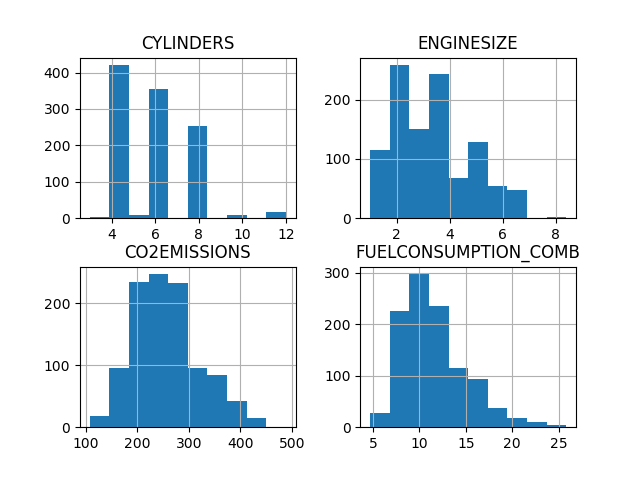

<Figure size 640x480 with 0 Axes>

In [19]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

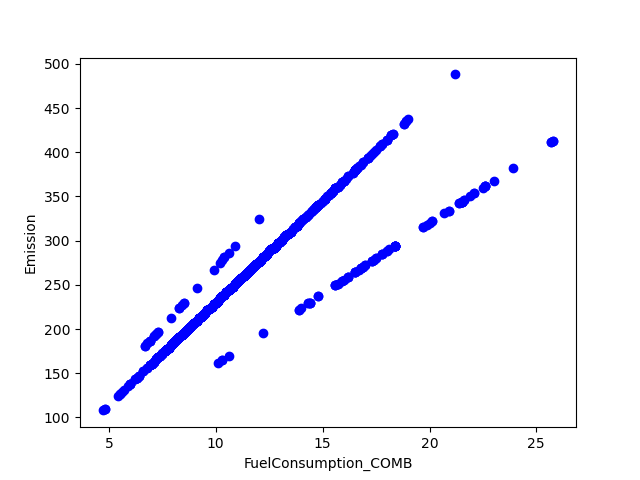

<Figure size 640x480 with 0 Axes>

In [23]:
# creating a scatter plot with labels of the axis

plt.scatter(cdf.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue')
plt.xlabel('FuelConsumption_COMB')
plt.ylabel('Emission')
plt.show()

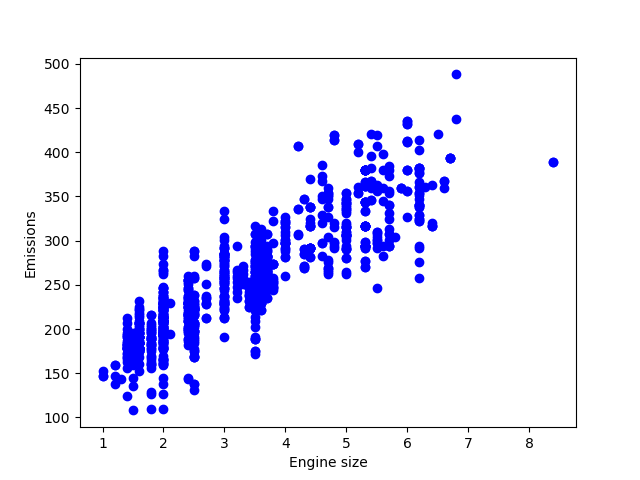

<Figure size 640x480 with 0 Axes>

In [24]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

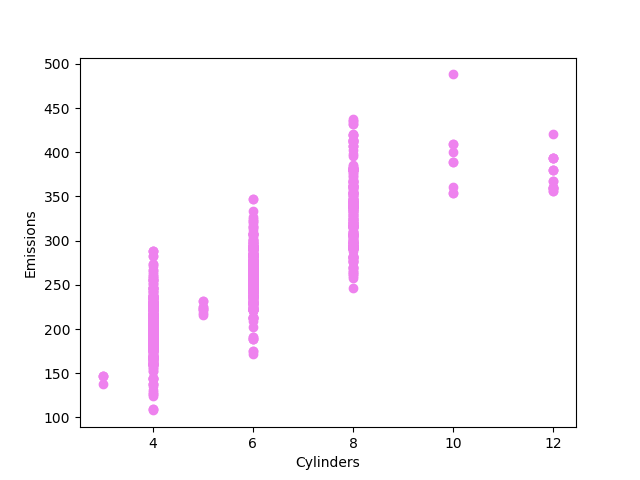

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot cylinder vs emissions to see how linear the relationshp is
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color ='violet')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

#### Creating Test and train datasets

In [29]:
# doing this we will create a random mask to select random rows
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

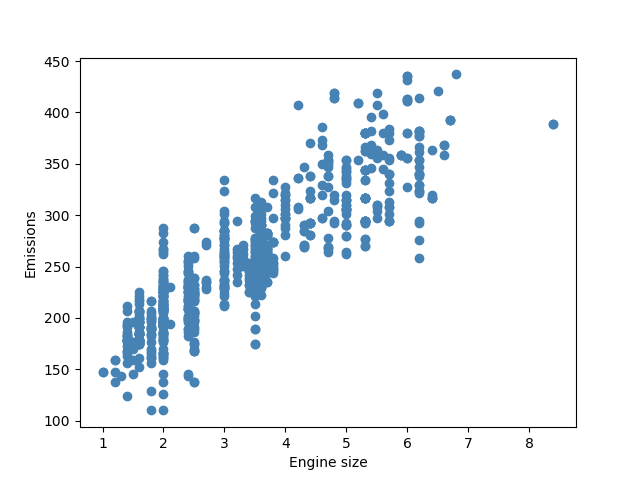

<Figure size 640x480 with 0 Axes>

In [32]:
# now to create a linear Regression Model
# Plotting the training 

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='steelblue')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()
           

### Modeling 

using the sklearn below to package the model 

In [36]:
# using sklearn 

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# the coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[38.88920112]]
Intercept: [126.04434195]


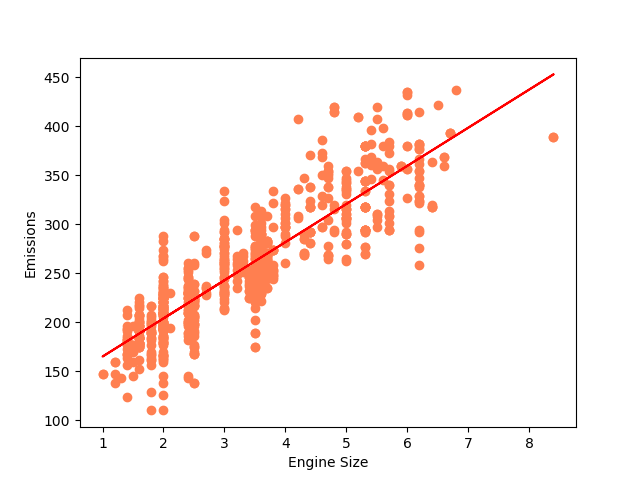

<Figure size 640x480 with 0 Axes>

In [37]:
# we are now plotting the fit line over the data now that we know the 
# intercepts and coefficient

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='coral')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [42]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y = regr.predict(test_x)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y -test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y - test_y)))
print('R2-score: %2f'% r2_score(test_y, test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.000000


 ### More practice Enjoy! 

Lets see what the evaluation metrics are if we trained a regression model using the FUELCONSUMPTION_COMB feature.

Start by selecting FUELCONSUMPTION_COMB as the train_x data from the train dataframe, then select FUELCONSUMPTION_COMB as the test_x data from the test dataframe

In [48]:
# train the dataframe with the train, test_x
# train the linear regression model uing train_x and train_y
regr = linear_model.LinearRegression()
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])


# fit the linear regression model
regr.fit(train_x, train_y)

# use the predictions function and the test_x
predictions = regr.predict(test_x)

# finally use the predictions and the test_y data to find the MAE,
# using np.abolute and np.mean
print( 'Mean Absolute Error: %2f' % np.mean(np.absolute(test_y -test_y)))
      

Mean Absolute Error: 0.000000
